<a href="https://colab.research.google.com/github/gandalf1819/Data-Science-portfolio/blob/master/CS6053_Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundations of Data Science
## Homework 3

Student Name: Chinmay Wyawahare 

Student Netid: cnw282
***

### Part 1 - Preparing a Training Set and Training a Decision Tree (Total 10 Points)
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `Cell2Cell_data.csv` (you can find this in the data folder).

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function from numpy but do not use the data splitting functions from Sklearn.<br><br>

(2 Points)

In [0]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cell = pd.read_csv("/content/gdrive/My Drive/CS6053_HW3/Cell2Cell_data.csv")
cell.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,48.82,10.00,3.0,26,780,0,0,0,0,1,4,1
1,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
2,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
3,51.42,0.00,0.0,36,59,1,0,0,0,0,4,1
4,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1


In [0]:
train_df = cell.sample(frac=0.8, random_state=1) # 80% of data chosen randomly without replacement
test_df = cell.drop(train_df.index) # 20% of the remaining data
# train_df.head()
test_df.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
9,53.69,15.00,2.33,23,267,1,0,0,0,1,3,1
14,7.82,0.00,0.00,24,561,0,0,0,0,0,2,1
15,25.14,15.00,1.00,25,743,1,0,0,0,0,2,1
18,5.00,0.00,0.00,53,1584,0,1,1,1,1,1,1
20,49.16,8.67,0.00,47,1434,0,1,0,0,1,1,1


2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

(1 Point)


<span style="color:blue">
Originally, the customers that churned and the customers that did not churn had the equal compostion which is about 50:50. After we randomly split the dataset in training and test dataset with 80% split for training and 20% split for testing, we have to ensure the composition of customers that churned and the customers that did not churn in each of the splits - 'train_df' and 'test_df'
  
We can ensure this by counting the number of customers that churned in train_df will be almost equal to number of customers that did not churn in train_df. Similarly for the number of customers that churned in test_df will be almost equal to the number of customers that did not churn in test_df.   
  
P(Churned | train_df) = P(Churned) <br>
P(Not churned | train_df) = P(Not churned)   
  
Thus, we can mathematically ensure that probability of the number of customers that churned in train_df is equal to the number of customers that churned in complete dataset. Similarly for the probability of number of customers that did not churn in train_df dataset will be equal to probability of the number of customers that did not churn in the complete dataset. Thus, the composition in the splits is independent of the percentage of splits.
</span>
</p>

3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

(1 Point)

In [0]:
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Clasifier
y_train = train_df['churndep'] # target variable
x_train = train_df.drop('churndep', axis=1)
y_test = test_df['churndep']
x_test = test_df.drop('churndep', axis=1)

clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

4\. Using the resulting model from 2.3, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

(3 Points)

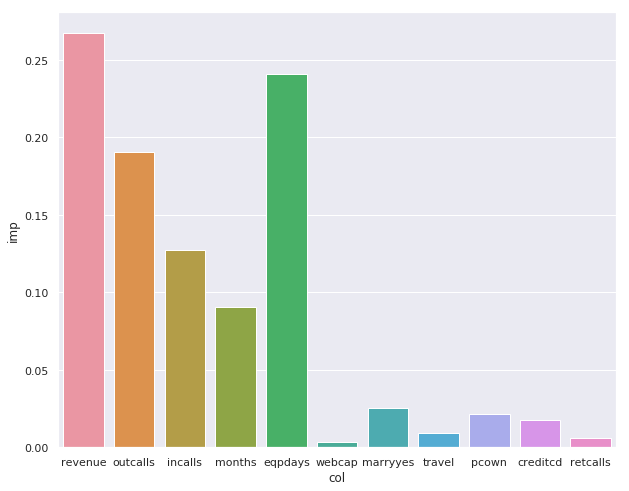

In [0]:
featureimp = clf.feature_importances_
cols = x_test.columns

df=pd.DataFrame.from_dict({'col': cols, 'imp': featureimp})
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
plt.figure(figsize=(10,8))
sns.barplot(x='col', y='imp', data=df)

5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

(2 Points)

In [0]:
# Create a 
corr_df = cell[['revenue','eqpdays', 'outcalls','churndep']].copy()
corr_df.corr()

,revenue,eqpdays,outcalls,churndep
revenue,1.000000,-0.221958,0.500870,-0.013566
eqpdays,-0.221958,1.000000,-0.243999,0.112731
outcalls,0.500870,-0.243999,1.000000,-0.037233
churndep,-0.013566,0.112731,-0.037233,1.000000


<p>
<span style="color:blue">
Relationship between the top 3 most important features:<br>
  
1. Revenue is postively correlated to outcalls with the correlation values to be 0.500870
2. Revenue is negatively correlated to eqpdays with the correlation values to be -0.221958
3. Eqpdays is negatively correlated to eqpdays with the correlation values to be -0.243999
  
We can observe a relationship between the top 3 most important features with the churndep from the correlation matrix.
  
1. Revenue is negatively correlated to the churndep with a correlation value to be -0.013566. In real world, this interprets to the fact that if the revenue for the company is increasing, then it is negatively impacting the customers like the company might be earning more revenue by increasing the rates for the plans which they sell to the market, but for a customer this could be a crucial factor for costumer to continue with the current plan or go to a different carrier since the company has increased the rates for the plan.
  
2. Eqpdays is positively correlated to churndep with a correlation value to be 0.112731. In real world, this interprets to the fact that if the number of Eqpdays are increases, customers might not find the current carrier options for the devices suitable to needs and might consider to shift to new carriers. They might not like the current plans provided for the current carrier plan, hence increase in churndep.
  
3. outcalls is negatively churndep with a correlation value to be -0.037233. In real world, this interprets to the fact that if the number of outcalls are more, there is a decrease in churndep implying customers tend to stay more. Increase in more outgoing calls indicate successful usage of the services.
</span>
</p>

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each?

(1 Point)

In [0]:
pred_train = clf.predict(x_train)
pred_test = clf.predict(x_test)

from sklearn.metrics import accuracy_score

print("Accuracy for training: " , accuracy_score(y_train, pred_train))
print("Accuracy for testing: " , accuracy_score(y_test, pred_test))

Accuracy for training:  0.9998118355442657
Accuracy for testing:  0.5309834420471651


### Part 2 - Finding a Good Decision Tree (Total 10 Points)
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:|

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

(1 Point)

In [0]:
min_samples_split = np.arange(10, 1000, 100)
min_samples_leaf = np.arange(10, 1000, 100)

2. Explain in words your reasoning for choosing the above ranges.

(1 Points)

<p>
<span style="color:blue">
The model developed shows overfitting of the data as shown by the difference in accuracy no train and test data set.
  
  
1. We choose a higher min_samples_split as the default value of 2 is very low and causes our model to overfit on the training data. Since the size of the data is very large, we select larger values.

2. We choose a higher min_samples_leaf as the default value of 1 is too low. However, we don't want the value to be too high as it can result in the model to demonstrate low variance and high bias.

</span>
</p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

(5 Points)

Optimal 'Sample Split Size' is 810 and 'Optimal Leaf Samples' are 110. Best accuracy is 59.09%


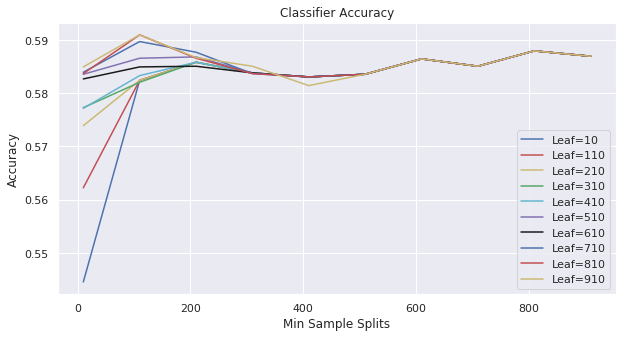

In [0]:
def DtreeIter(train_features,train_target,test_features,test_target,samplesplit,sampleleaf):
    treeOpt=DecisionTreeClassifier(criterion="entropy",min_samples_split=samplesplit,min_samples_leaf=sampleleaf)
    treeOpt=treeOpt.fit(train_features,train_target)
    result_Opt=treeOpt.predict(test_features)
    return accuracy_score(test_target,result_Opt)

result_optimise=dict()
for values in min_samples_split:
    result_optimise[values]=list()

for values in min_samples_split:
    for nodes in min_samples_leaf:
        result_optimise[values].append([DtreeIter(x_train,y_train,x_test,y_test,values,nodes)])

      
        
#To find out best parameters        
optimal_split=max(result_optimise, key=lambda x: result_optimise[x][1])
optimal_accuracy=max(result_optimise[optimal_split])
optimal_leaf=min_samples_leaf[list(result_optimise[optimal_split]).index(optimal_accuracy)]
print("Optimal 'Sample Split Size' is %d and 'Optimal Leaf Samples' are %d. Best accuracy is %.2f%%" %(optimal_split,optimal_leaf,optimal_accuracy[0]*100))


plt.figure(figsize=(10,5))
plt.plot(min_samples_split,result_optimise[min_samples_leaf[0]],'b',label='Leaf={}'.format(min_samples_leaf[0]))
plt.plot(min_samples_split,result_optimise[min_samples_leaf[1]],'r',label='Leaf={}'.format(min_samples_leaf[1]))
plt.plot(min_samples_split,result_optimise[min_samples_leaf[2]],'y',label='Leaf={}'.format(min_samples_leaf[2]))
plt.plot(min_samples_split,result_optimise[min_samples_leaf[3]],'g',label='Leaf={}'.format(min_samples_leaf[3]))
plt.plot(min_samples_split,result_optimise[min_samples_leaf[4]],'c',label='Leaf={}'.format(min_samples_leaf[4]))
plt.plot(min_samples_split,result_optimise[min_samples_leaf[5]],'m',label='Leaf={}'.format(min_samples_leaf[5]))
plt.plot(min_samples_split,result_optimise[min_samples_leaf[6]],'k',label='Leaf={}'.format(min_samples_leaf[6]))
plt.plot(min_samples_split,result_optimise[min_samples_leaf[7]],'b',label='Leaf={}'.format(min_samples_leaf[7]))
plt.plot(min_samples_split,result_optimise[min_samples_leaf[8]],'r',label='Leaf={}'.format(min_samples_leaf[8]))
plt.plot(min_samples_split,result_optimise[min_samples_leaf[9]],'y',label='Leaf={}'.format(min_samples_leaf[9]))
plt.legend(loc=4)
plt.xlabel('Min Sample Splits')
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy')
plt.show()

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

(1 Point)

<p>
<span style="color:blue">
When we set the Sample Split size to 710 and the Optimal Leaf Samples to 110, we get the best accuracy of 59.09% This accuracy represents the percentage of times our model predicts the correct output. Values predicted by the model are compared with actual value in the test data set to determine this parameter.
</span>
</p>

5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

(2 Points)

<p>
<span style="color:blue">

* By analysing customer churn, a company can take reasonable steps to retain the existing customer. Losing a customer will not only cost the company in lost revenue, but the company will also incur additional cost to bring in a new customer which often results in higher costs due to extra advertising or onboarding benefits. Customer acquisition is 5-40 times more expensive than customer retention and it makes economic sense for the company to keep existing customers happy. Doing so may also result in an increase in profits due to increased engagement with customers.
    
* By analysing employee churn, a company can retain its high performing employees by rewarding them with perks and benefits as the salesperson is often the face of the company during negotiations. Loss of a high performing employee will cause a drop in sales and might also cause existing customers associated with that salesperson to shift loyalties.

* By referring to the churn prediction model, the company can take decisive steps to pursue its employees and customers.

    E.g.: A customer identified by the model may be rewarded with a free discount voucher or a free exclusive service for a trial period or more industry relevant and personally rewarding offers. By doing so, the customer may feel more attached to the company resulting in an enhanced utilisation of related products and services.
  <br>
    E.g.: A high performing salesperson identified by the model can be rewarded with a free holiday package or a free mobile phone or more personally rewarding products and services in order to increase the employee's association with the company.

</span>
</p>

### Part 3 - Working with Time Series (Total 10 Points)
Here we will analyze a timeseries of number of Yellow Fever cases from a specific Asian country by year. The data is from 1700 – 2008. The file `cases.csv` is available in the data folder.



1\. Load the cases data set, and prepare the dataset by converting the variables to date-time format (hint: use date tools). (1 point)

In [0]:
from scipy import stats
from statsmodels.graphics.api import qqplot

df = pd.read_csv("/content/gdrive/My Drive/CS6053_HW3/cases.csv")
df["YEAR"] = pd.to_datetime(df["YEAR"], format="%Y")

2\. Plot the autocorrelation function (ACF) and partial autocorrelation function (PCF) of the cases timeseries. (1 point)

<Figure size 1008x1008 with 0 Axes>

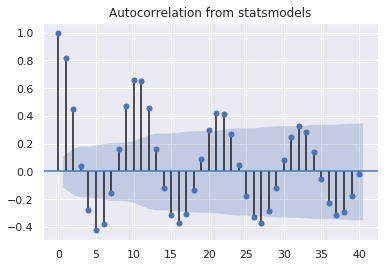

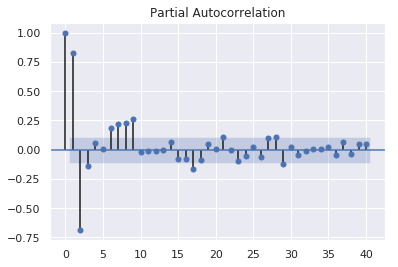

In [0]:
from pandas.plotting import autocorrelation_plot
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

d = dict(zip(df.YEAR, df.YFCASES))
series_acf = pd.Series(d)
f = plt.figure(1,figsize = (14,14))
plot_acf(series_acf, lags = 40, title = 'Autocorrelation from statsmodels')
f2 = plt.figure(2)
plot_pacf(series_acf, lags = 40)
plt.show()

3\. Describe what the plots indicate (in terms of autocorrelation and autoregressive parameter (p) and moving average (q)). 2 points.
Some rules of thumb to recall:<br>
Rule 1: If the ACF shows exponential decay, the PACF has a spike at lag 1, and no correlation for other lags, then use one autoregressive (p)parameter <br>
Rule 2: If the ACF shows a sine-wave shape pattern or a set of exponential decays, the PACF has spikes at lags 1 and 2, and no correlation for other lags, the use two autoregressive (p) parameters. <br>
Rule 3: If the ACF has a spike at lag 1, no correlation for other lags, and the PACF damps out exponentially, then use one moving average (q) parameter. <br>
Rule 4: If the ACF has spikes at lags 1 and 2, no correlation for other lags, and the PACF has a sine-wave shape pattern or a set of exponential decays, then use two moving average (q) parameter.<br>
Rule 5: If the ACF shows exponential decay starting at lag 1, and the PACF shows exponential decay starting at lag 1, then use one autoregressive (p) and one moving average (q) parameter.<br>


1. The autocorrelation plot shows a sine-wave pattern meaning that the data exhibits strong seasonality.
2. The partial autocorrelation plot shows sharp spikes at lag of 1 and 2.

We use "Rule 2" and select the autocorrelation parameter as 2 i.e. p=2 and q=0

4\. Another approach to assessing the presence of autocorrelation is by using the  Durbin-Waton (DW) statistic. The value of the DW statistic is close to 2 if the errors are uncorrelated. What is DW for our data, and does this match what you observed from the ACF and PCF plots? (1 point) 

In [0]:
# from statsmodels.stats.stattools import durbin_watson
# durbin_watson(series_acf)

import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA

df2=df.set_index('YEAR')
yf_cases=df2.astype(float)
arma_model = sm.tsa.ARMA(yf_cases, (3,0)).fit()

sm.stats.durbin_watson(arma_model.resid.values)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


1.956480935071552

5\. Removing serial dependency by modeling a simple ARMA process with p and q as derived above. Take a look at what the resulting process looks like (plot) (1 point)


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)


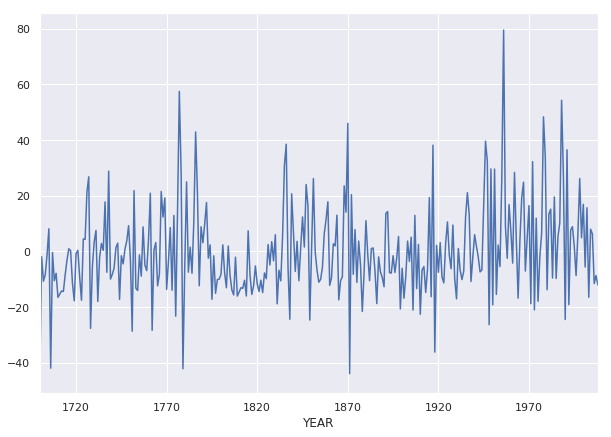

In [0]:
df2=df.set_index('YEAR')
yf_cases=df2.astype(float)
arma_model = sm.tsa.ARMA(yf_cases, (3,0)).fit()
plt.figure(figsize=(10,7))
arma_model.resid.plot()

6\. Calculate the residuals, and test the null hypothesis that the residuals come from a normal distribution, and construct a qq-plot. Do the results of the hypothesis test and qq-plot align? (1 point)



NormaltestResult(statistic=49.84499867475388, pvalue=1.5007075329892837e-11)


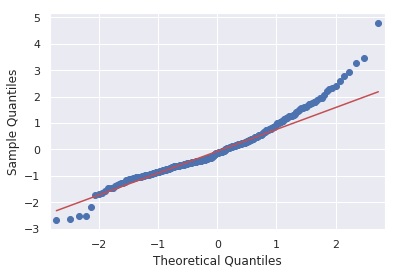

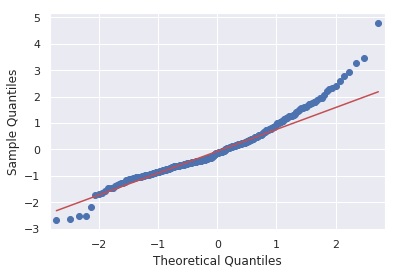

In [0]:
plt.figure(figsize=(10,7))
from statsmodels.graphics.api import qqplot
import scipy.stats as stats
residuals = arma_model.resid
print(stats.normaltest(residuals))

qqplot(residuals, line="q" ,fit=True)

<p>
<span style="color:blue">
Place your response here
</span>
</p>


7\. Now investigate the autocorrelation of your ARMA(p,q) model. Did it improve?
These can be examined graphically, but a statistic will help.
Next, we calculate the lag, autocorrelation (AC), Q statistic and Prob>Q. 
The Ljung–Box Q test is a type of statistical test of whether any of a group of autocorrelations of a time series are different from zero. The null hypothesis is, H0: The data are independently distributed (i.e. the correlations in the population from which the sample is taken are 0, so that any observed correlations in the data result from randomness of the sampling process). (Hint: use qstat in tsa.acf).


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:935: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


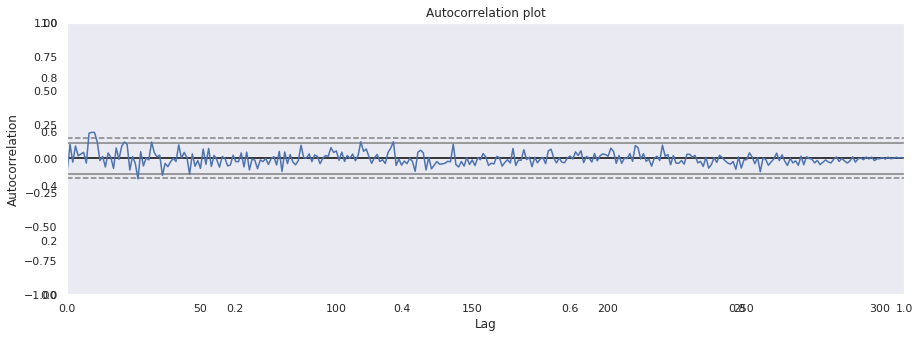

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


(array([ 1.00000000e+00, -8.52201480e-02,  1.03691479e-01, -2.78328801e-02,
         9.11224849e-02,  1.90096107e-02,  3.13205156e-02,  4.44845860e-02,
        -3.43373295e-02,  1.85689571e-01,  1.91607611e-01,  1.90384965e-01,
         1.21692867e-01, -1.62188248e-02,  1.49863352e-02, -6.31966396e-02,
         3.97300545e-02,  9.57661957e-03, -7.36448074e-02,  7.64692146e-02,
        -6.82679616e-03,  8.88181389e-02,  1.20484588e-01,  1.03328483e-01,
        -8.57282331e-02,  1.37300213e-02, -3.61829740e-02, -1.50155878e-01,
         4.96801663e-02, -5.54670861e-02,  3.35398983e-03, -1.09052767e-02,
         1.20385666e-01,  4.26796266e-02,  1.11070938e-02,  2.42613168e-02,
        -1.25046084e-01, -3.63935185e-02, -6.05085366e-02, -2.44395736e-02,
         5.81176082e-04]),
 array([ 2.26596251,  5.63159455,  5.87487865,  8.49107382,  8.60530686,
         8.91643124,  9.54612738,  9.9225584 , 20.96773439, 32.76749485,
        44.45624031, 49.24797393, 49.33337551, 49.40653788, 50.7119

In [0]:
plt.figure(figsize=(15,5))
plt.title("Autocorrelation plot")
autocorrelation_plot(arma_model.resid)
plt.show()
acfValue=acf(arma_model.resid,qstat=True)
autocorrelation_value=acfValue[0]
qstat_value=acfValue[1]
p_value=acfValue[2]
acfValue

<p>
<span style="color:blue">


*   The autocorrelation plot has improved as the sinusoidal pattern is absent now. We have reduced the impact of seasonality using the ARMA model.
*   The Ljung-Box Q test is useed to indicate whether our data is independently distributed or not. By observing the p-values, we can reject the null hypothesis of the data being independently distributed. 


</span>
</p>

8\. Compute prediction for years 2009-2012 and analyze their fit against actual values. (1 point)



In [0]:
from pandas import datetime
begin_year = datetime(2009,1,1)
end_year = datetime(2012,1,1)
forecasted = arma_model.predict(start=begin_year, end=end_year)
forecasted

2009-01-01    14.753358
2010-01-01    33.507852
2011-01-01    52.477667
2012-01-01    66.087985
Freq: AS-JAN, dtype: float64

9\. Calculate the forecast error via MAE and MFE.  (2 points)
Reminders:
Mean absolute error: The mean absolute error (MAE) value is computed as the average absolute error value. If MAE is zero the forecast is perfect. As compared to the mean squared error (MSE), this measure of fit “de-emphasizes” outliers (unique or rare large error values will affect the MAE less than the MSE.

Mean Forecast Error (MFE, also known as Bias). The MFE is the average error in the observations. A large positive MFE means that the forecast is undershooting the actual observations. A large negative MFE means the forecast is overshooting the actual observations. A value near zero is ideal, and generally a small value means a pretty good fit. 

The MAE is a better indicator of fit than the MFE.



In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

ferror_begin=datetime(1700,1,1)
ferror_end=datetime(2008,1,1)
predictionARMA=arma_model.predict(start=ferror_begin,end=ferror_end)
MAE=mean_absolute_error(df["YFCASES"],predictionARMA)
MFE =np.mean(df.YFCASES.values.tolist()- predictionARMA)
print("MAE is %f and MFE is %f" %(MAE,MFE))


MAE is 12.554732 and MFE is -0.082178




*   Mean Absolute Error (MAE) is 12.55 which means that the model is not perfect and that values predicted by the model deviate from the true values
*   Mean Forecast Error (MFE) is -0.08 which implies that the model predicts values that are much lesser than the true values.

